## Import Necessary libaries 

In [1]:
# Training the model and assessing feature importance
# Importing necessary libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")   #open file as a dataframe

In [3]:
df.head() # check data first 5 rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Inspection
 * This is to look into the data have a full Understanding of the data,this also goes with data cleaning and preparation

In [4]:
df.info() # shows that data as all numerical column with just gender been a categorical column(objects)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
#Check duplicates values
dupli_val = df[df.duplicated()]

In [6]:
print("Number of duplicated vaue: ", dupli_val.shape) 

Number of duplicated vaue:  (3854, 9)


In [7]:
#Drop duplicates values
df = df.drop_duplicates()

In [8]:
df.duplicated().sum() #confiremed that duplicate value have been removed 

0

In [9]:
#Check Data shape after duplicate value was removed
df.shape

(96146, 9)

In [10]:
#Check NAh value in the data set
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
#Check for unique valuein the data sets
for i in df.columns:
    print (i)
    print(df[i].nunique())

gender
3
age
102
hypertension
2
heart_disease
2
smoking_history
6
bmi
4247
HbA1c_level
18
blood_glucose_level
18
diabetes
2


In [13]:
 df['gender'].unique() #check the unique value in gender 

array(['Female', 'Male', 'Other'], dtype=object)

In [14]:
 df['gender'].value_counts() # value count for gender column 

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [15]:
## select only male and female gender
df = df[df['gender'] != 'Other']

In [16]:
 df['gender'].value_counts() # confirmed that the 'others' have been removed 

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [17]:
 df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [19]:
 df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### Exploratory Analysis

In [20]:
# Function to assign age group based on age
def categorize_age(age):
    if age >= 0 and age <= 12:
        return 'Child'
    elif age >= 13 and age <= 19:
        return 'Teenager'
    elif age >= 20 and age <= 40:
        return 'Young Adults'
    elif age >=41 and age <= 60:
        return 'Adults'
    else:
        return 'Old_Aged' 

# Apply the function to create the age_group column
df['age_group'] = df['age'].apply(categorize_age)

In [21]:
print(df[['age', 'age_group']].head())

    age     age_group
0  80.0      Old_Aged
1  54.0        Adults
2  28.0  Young Adults
3  36.0  Young Adults
4  76.0      Old_Aged


In [22]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Old_Aged
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adults
2,Male,28.0,0,0,never,27.32,5.7,158,0,Young Adults
3,Female,36.0,0,0,current,23.45,5.0,155,0,Young Adults
4,Male,76.0,1,1,current,20.14,4.8,155,0,Old_Aged


 ## Create the boxplots for features

Text(0.5, 1.0, 'Distribution of blood_glucose_level')

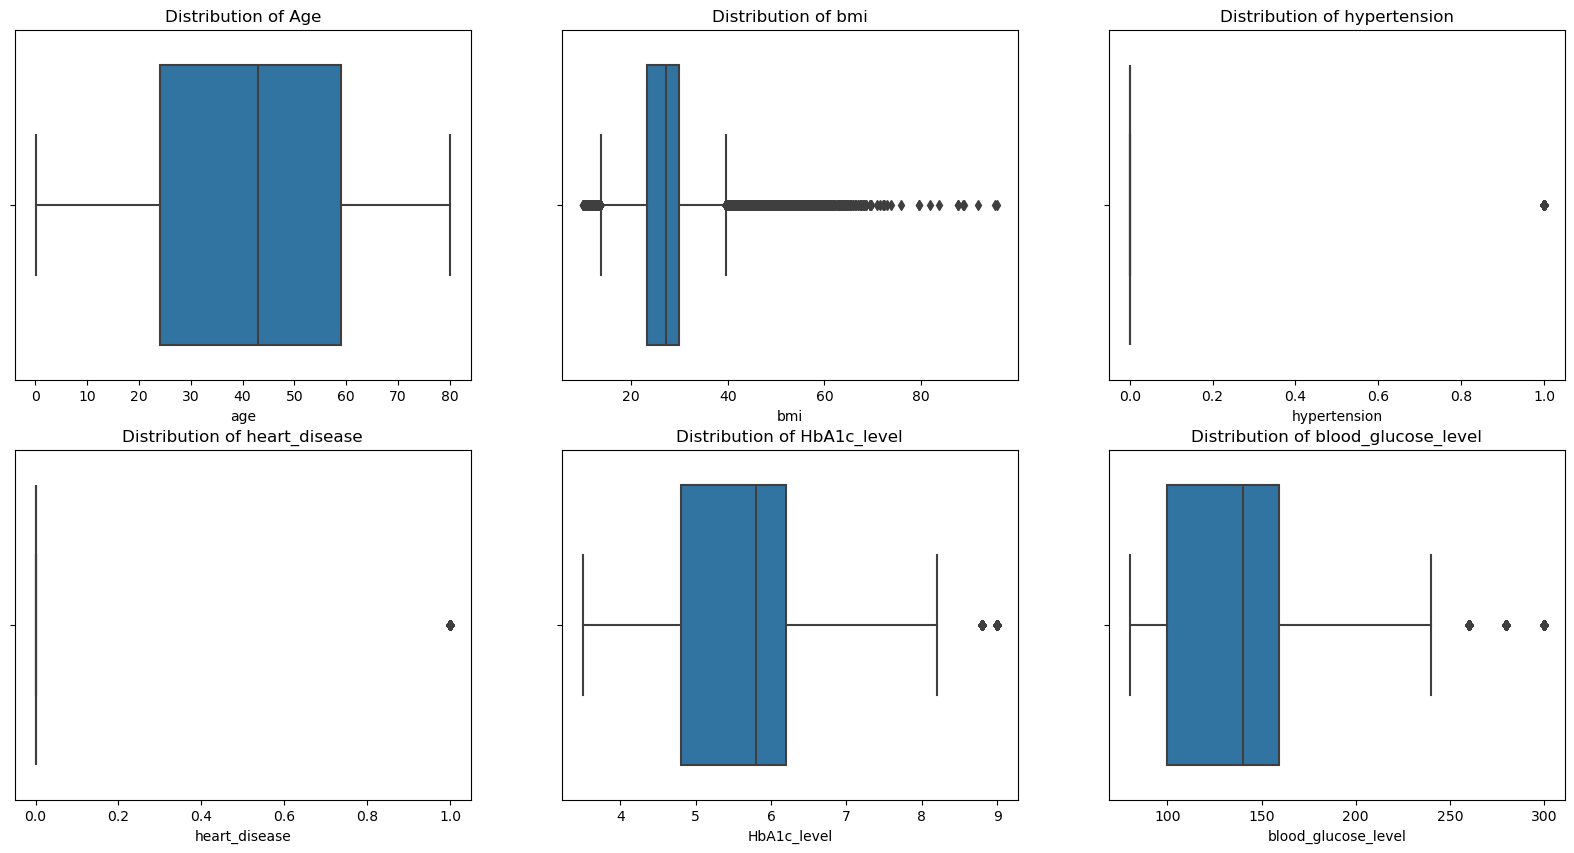

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # Create the figure and axes with a 2x3 grid


sns.boxplot(x= "age",data=df, ax=axes[0,0])
axes[0, 0].set_title("Distribution of Age")

sns.boxplot(x= "bmi",data=df, ax=axes[0,1])
axes[0, 1].set_title("Distribution of bmi")

sns.boxplot(x= "hypertension",data=df, ax=axes[0,2])
axes[0, 2].set_title("Distribution of hypertension")

sns.boxplot(x= "heart_disease",data=df, ax=axes[1,0])
axes[1, 0].set_title("Distribution of heart_disease")

sns.boxplot(x= "HbA1c_level",data=df, ax=axes[1,1])
axes[1, 1].set_title("Distribution of HbA1c_level")

sns.boxplot(x= "blood_glucose_level",data=df, ax=axes[1,2])
axes[1, 2].set_title("Distribution of blood_glucose_level")


* It shows that most of the individuals Ages are between around 30 and 60 years old, with no significant outliers.
* This plot reveals several outliers, indicating that a small number of individuals have very high BMI values above 60.
* The data shows that many individuals do not have hypertension (more 0 values), with a smaller number of positive cases.
* The plot shows that most individuals do not have heart disease (more 0 values), while a few have it (1 values).
* The box plot suggests most individuals have HbA1c levels between 5 and 10, with a few outliers having higher levels.
* The glucose level range, showing that most values lie between 80 and 120, but there are a few high outliers above 200.
* The dataset is dominated by individuals without heart disease.
*  Most individuals are near the pre-diabetic or diabetic range based on their HbA1c levels.
*  While most people have blood glucose levels within a standard range, there are a few extreme outliers with elevated glucose levels.

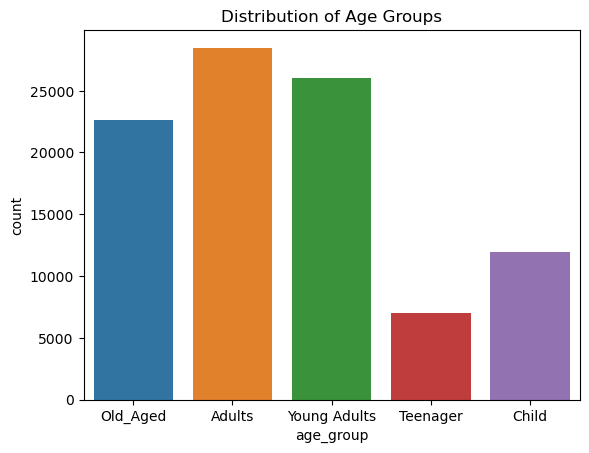

In [24]:
plt.title("Distribution of Age Groups")
# Display value_count for age_group
sns.countplot(x= "age_group",data=df);

* Adults form the largest group, with the highest count.
* Young Adults come next in terms of population size, followed by the Old_Aged group.
* Children are fewer in the dataset compared to these older age groups.
* Teenagers represent the smallest age group in this dataset.

NB:The predominance of Adults, Young Adults, and Old_Aged groups makes sense, as diabetes is often more prevalent in these age categories.

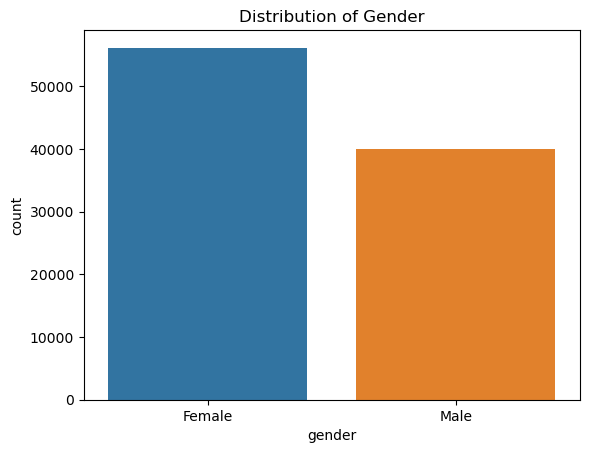

In [25]:
plt.title("Distribution of Gender")
sns.countplot(x= "gender",data=df);

* Female gender occur the most by counts in the datasets 

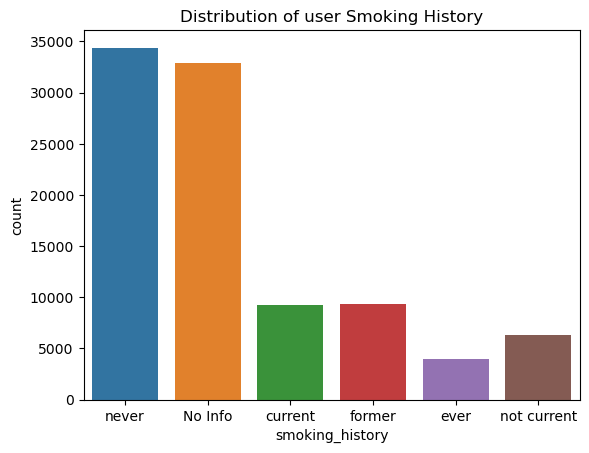

In [26]:
plt.title("Distribution of user Smoking History")
sns.countplot(x= "smoking_history",data=df);

 This shows the relationship between Age and Diabetes patients outcome

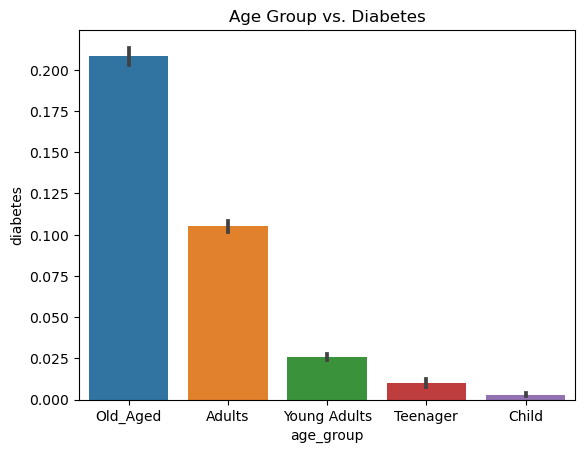

In [27]:
# Visualizing the data using Matplotlib
#this shows that older Generation are more diabetics compare to other Age brackets
# Creating the bar plot
sns.barplot(x="age_group", y="diabetes", data=df)
# Adding a title
plt.title("Age Group vs. Diabetes")
# Display the plot
plt.show()

In [28]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

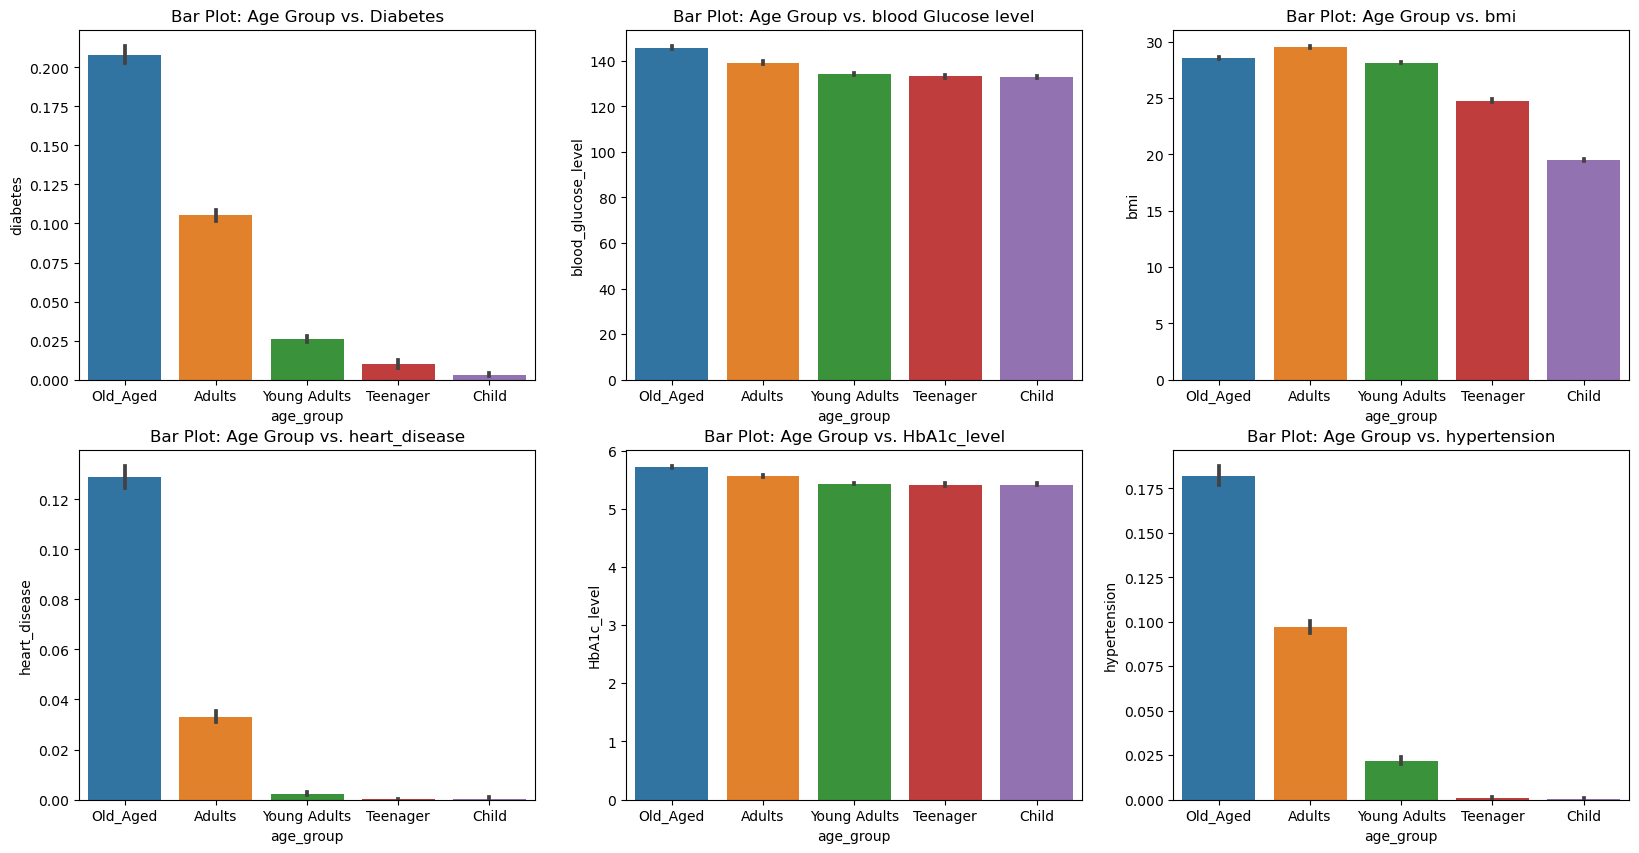

In [29]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.barplot(x="age_group", y="diabetes", data=df,ax=axes[0,0])
axes[0, 0].set_title("Bar Plot: Age Group vs. Diabetes")

sns.barplot(x="age_group", y="blood_glucose_level", data=df,ax=axes[0,1])
axes[0, 1].set_title("Bar Plot: Age Group vs. blood Glucose level")

sns.barplot(x="age_group", y="bmi", data=df,ax=axes[0,2])
axes[0, 2].set_title("Bar Plot: Age Group vs. bmi")


sns.barplot(x="age_group", y="heart_disease", data=df,ax=axes[1,0])
axes[1, 0].set_title("Bar Plot: Age Group vs. heart_disease")

sns.barplot(x="age_group", y="HbA1c_level", data=df,ax=axes[1,1])
axes[1, 1].set_title("Bar Plot: Age Group vs. HbA1c_level")

sns.barplot(x="age_group", y="hypertension", data=df,ax=axes[1,2])
axes[1, 2].set_title("Bar Plot: Age Group vs. hypertension");

* Older-aged individuals have the highest prevalence of diabetes, followed by adults, young adults, teenagers, and children, with diabetes rates declining significantly with younger age groups.
* The blood glucose level remains relatively consistent across different age groups, with no significant variation between children, teenagers, young adults, adults, and older-aged individuals.
* Older-aged and adult individuals have higher average BMI compared to younger age groups, with children having the lowest BMI, followed by teenagers and young adults.
* The prevalence of heart disease is highest among the older-aged group, significantly higher than in adults, young adults, teenagers, and children.
* Similar to blood glucose levels, HbA1c levels are fairly consistent across different age groups, with slight differences between older-aged, adults, young adults, teenagers, and children.
* Older-aged individuals have a much higher prevalence of hypertension compared to other age groups, followed by adults. Hypertension is almost negligible in younger groups like teenagers and children.

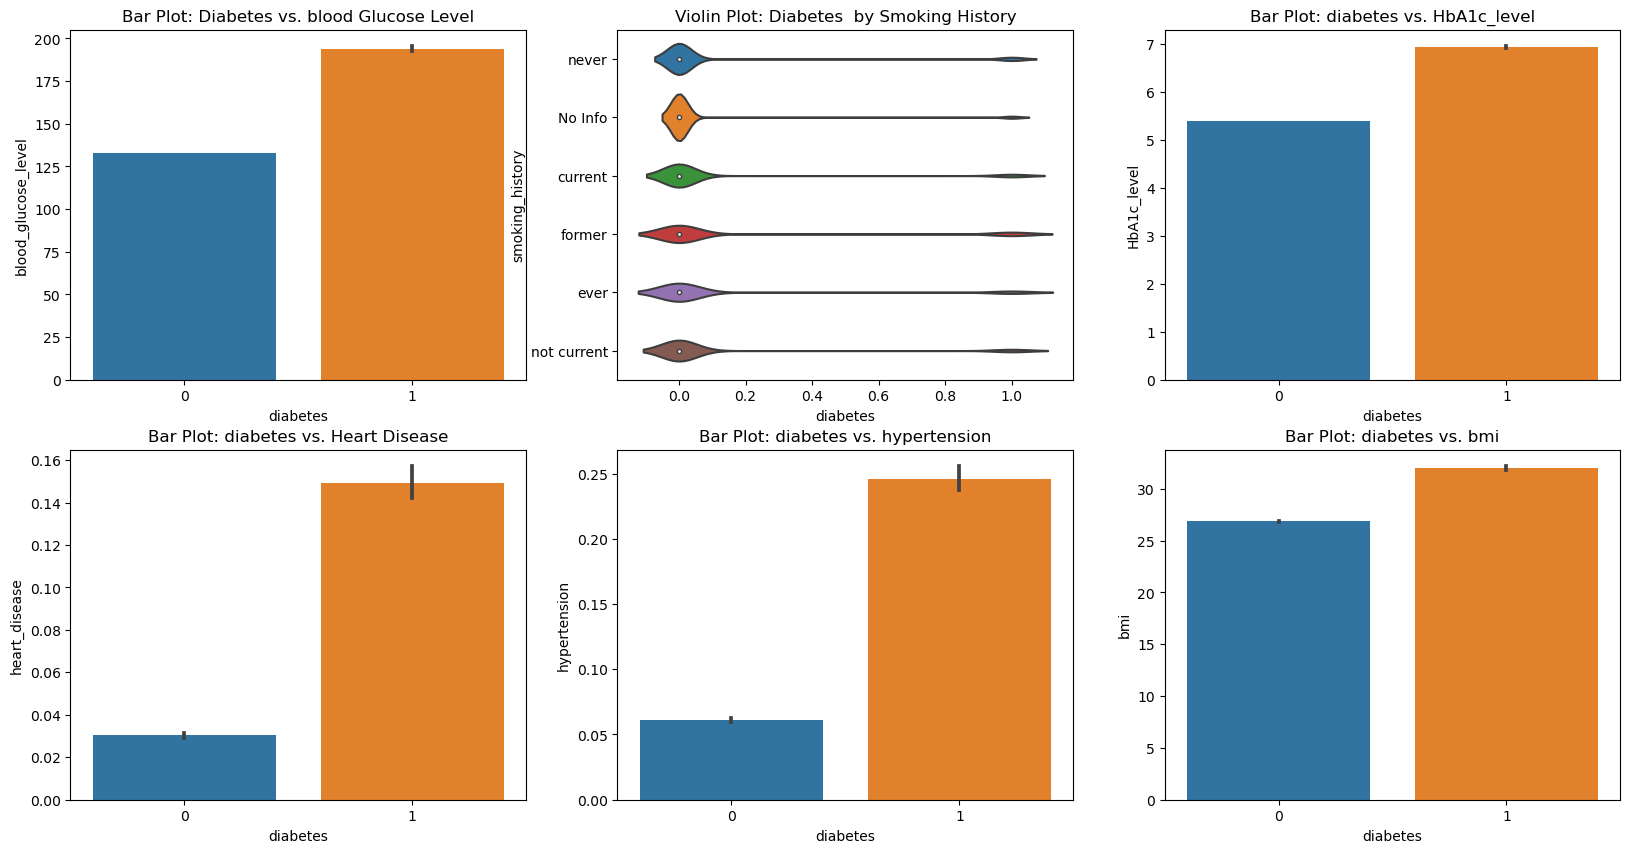

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(20 , 10))
sns.barplot(x="diabetes", y="blood_glucose_level", data=df,ax=axes[0,0])
axes[0, 0].set_title("Bar Plot: Diabetes vs. blood Glucose Level")

# Violin Plot
sns.violinplot(y="smoking_history", x="diabetes", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Violin Plot: Diabetes  by Smoking History")

sns.barplot(x="diabetes", y="HbA1c_level", data=df,ax=axes[0,2])
axes[0, 2].set_title("Bar Plot: diabetes vs. HbA1c_level")

sns.barplot(x="diabetes", y="heart_disease", data=df,ax=axes[1,0])
axes[1, 0].set_title("Bar Plot: diabetes vs. Heart Disease")

sns.barplot(x="diabetes", y="hypertension", data=df,ax=axes[1,1])
axes[1, 1].set_title("Bar Plot: diabetes vs. hypertension")

sns.barplot(x="diabetes", y="bmi", data=df,ax=axes[1,2])
axes[1, 2].set_title("Bar Plot: diabetes vs. bmi");

* Individuals with diabetes (1) have higher average blood glucose levels compared to non-diabetics (0)
* Various smoking categories (current, former, never, etc.) are displayed, with slightly different distributions for diabetics and non-diabetics.
* People with diabetes (1) have significantly higher HbA1c levels compared to non-diabetics (0), indicating that HbA1c is a key metric associated with diabetes.
* The prevalence of heart disease is higher among individuals with diabetes compared to those without it.
* There is a noticeable difference in the prevalence of hypertension, with individuals who have diabetes being more likely to have hypertension.
*The average BMI is higher among individuals with diabetes compared to non-diabetics.

In [31]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [32]:
Diabetes_target = df.groupby("age_group")[["blood_glucose_level","hypertension","HbA1c_level"]].sum().reset_index()

In [33]:
Diabetes_target

,age_group,blood_glucose_level,hypertension,HbA1c_level
0,Adults,3968562,2762,158465.8
1,Child,1593165,4,64904.0
2,Old_Aged,3296221,4119,129184.5
3,Teenager,937770,6,38105.8
4,Young Adults,3490902,570,141180.8


Interpretation:
Dark Red/Blue Cells: Indicate strong positive/negative correlations.
Light Cells: Indicate weaker correlations.
Diagonal Cells: These will always be 1, as they represent the correlation of each variable with itself.

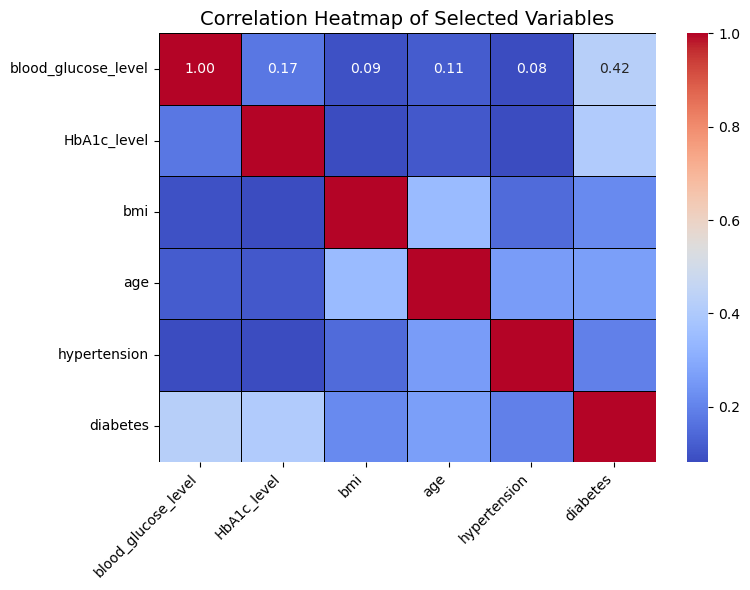

In [69]:
# Generate the correlation matrix for the selected variables
subset_corr_matrix = df[['blood_glucose_level', 'HbA1c_level', 'bmi', 'age', 'hypertension', 'diabetes']].corr()

# Set the plot size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations (correlation values) for each relationship
ax = sns.heatmap(subset_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                 linewidths=0.5, linecolor='black', cbar=True)

# Set title and axis labels
plt.title("Correlation Heatmap of Selected Variables", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()

* Blood glucose level and HbA1c level have a correlation of 0.17, indicating a weak positive relationship.
* Blood glucose level and diabetes have a correlation of 0.42, which is a moderate positive correlation.
* Age and hypertension have a low correlation of 0.085, showing almost no relationship.

In [35]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group'],
      dtype='object')

In [36]:
# Create a new column called 'gender_num'
df['gender_num'] = df['gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)

## encode categorical variable Smoking History

In [37]:
# 'smoking_history' is the column to encode
label_encoder = LabelEncoder()
df['smoking_history_'] = label_encoder.fit_transform(df['smoking_history'])

In [38]:
# Remove all columns with data type 'object'
df = df.select_dtypes(exclude=['object'])

In [39]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_
0,80.0,0,1,25.19,6.6,140,0,0,4
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1


### Features Selection

In [40]:
#Create a DataFrame for the target column
df1 = df[['diabetes']]

# Create a DataFrame for the other columns (excluding the target column)
df2 = df.drop(columns=['diabetes'])

In [41]:
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_history_
0,80.0,0,1,25.19,6.6,140,0,4
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,1,4
3,36.0,0,0,23.45,5.0,155,0,1
4,76.0,1,1,20.14,4.8,155,1,1


In [42]:
df1.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing 

* Split data into Training and test sets 80% Training and 20% Test
* Normalized features data using MinMax Scaler() to handles outliers 

In [43]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df2, df1, test_size=0.2, random_state=42)

In [44]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data (all columns except the target)
normalized_data = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# Check the normalized data
print(normalized_data.head(5))

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000           0.0            1.0  0.177171     0.563636   
1  0.674675           0.0            0.0  0.202031     0.563636   
2  0.349349           0.0            0.0  0.202031     0.400000   
3  0.449449           0.0            0.0  0.156863     0.272727   
4  0.949950           1.0            1.0  0.118231     0.236364   

   blood_glucose_level  gender_num  smoking_history_  
0             0.272727         0.0               0.8  
1             0.000000         0.0               0.0  
2             0.354545         1.0               0.8  
3             0.340909         0.0               0.2  
4             0.340909         1.0               0.2  


## MODEL Selection and Training

# Linear Regression Model

In [45]:
# Training the model and assessing feature importance
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.05268877957834909
R-squared (R2 Score): 0.3466683842462852
Mean Absolute Error (MAE): 0.1579083727735746
Root Mean Squared Error (RMSE): 0.22954036590183674


* Mean Squared Error (MSE): 0.0527 "meaning that, on average, the squared differences between predicted and actual values are small."
* R-squared (R² Score): 0.3467 "model explains 34.67% of the variance in the target variable,It means the model is not very strong at predicting the target variable."
* Mean Absolute Error (MAE): 0.1579 "indicates that, on average, the model’s predictions are off by about 0.1579 units from the actual values."
* Root Mean Squared Error (RMSE): 0.2295 "suggests that the model’s predictions are off by around 0.2295 units on average."

NB: 
* MSE, MAE, and RMSE: These error values are relatively small, indicating that the model's predictions are generally close to the actual values.
* R² Score: The moderate R² of 0.3467 suggests that the model doesn’t explain much of the variability in the target variable, meaning it could be underfitting.


# Ridge Regression model

In [47]:
# Training the model and assessing feature importance
# Initialize and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha value
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge - MSE: {mse_ridge}, R²: {r2_ridge}")


Ridge - MSE: 0.052688764589597384, R²: 0.3466685701041746


* The MSE for both Ridge and Linear Regression is nearly identical. In fact, the difference is so small that it suggests Ridge has not significantly changed the overall error.
* This indicates that Ridge regularization hasn't reduced the error much in this case(due to the very close results in MSE of both linear regression and Ridge).
* R² scores are also extremely close between the two models,This shows that Ridge has not significantly improved the proportion of variance explained by the model.

# Lasso Regression model

In [48]:
# Training the model and assessing feature importance
# Initialize and train a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha value
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso - MSE: {mse_lasso}, R²: {r2_lasso}")


Lasso - MSE: 0.061551101574536644, R²: 0.23677714752691836


* Lasso's MSE (0.0615) is worse than both Ridge and Linear Regression, indicating that Lasso has a higher prediction error.
* Lasso's R² (0.2367) is lower than Ridge (0.3467) and Linear Regression (0.3467), meaning that Lasso explains a lower proportion of the variance in the target variable.
* This indicates that Lasso was less effective in capturing the underlying patterns in your data compared to Ridge and Linear Regression.

In [49]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [50]:
# Ensure y_train and y_test are 1D arrays using .ravel() directly
y_train = y_train.ravel()  # No need for .values since it's already a NumPy array
y_test = y_test.ravel()

# Gradient Boosting Model

In [51]:
# Training the model and assessing feature importance
# Now, train your model without the warning
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [52]:
# Print evaluation metrics
print(f"Gradient Boosting - MSE: {mse_gb}")
print(f"Gradient Boosting - MAE: {mae_gb}")
print(f"Gradient Boosting - R²: {r2_gb}")

Gradient Boosting - MSE: 0.02511773913414889
Gradient Boosting - MAE: 0.05711154011618834
Gradient Boosting - R²: 0.6885444448719571


* MSE of 0.0251 suggests that your model has relatively small prediction errors.
* MAE of 0.0571 also indicates that your model's predictions are fairly close to the actual values.
* R² of 0.6885 means that approximately 68.85% of the variance in the target variable is explained by the model.

# Random Forest Regressor

In [53]:
# Training the model and assessing feature importance
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators and other hyperparameters

# Train the model
rf_model.fit(X_train, y_train)  # No need to scale features for Random Forest

RandomForestRegressor(random_state=42)

In [54]:
# Training the model and assessing feature importance
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [55]:
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - R²: {r2_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")

Random Forest - MSE: 0.028125371194898167
Random Forest - MAE: 0.0527750386381537
Random Forest - R²: 0.6512503353942448
Random Forest - RMSE: 0.16770620499819966


* (MAE) - 0.0528: This is lower than the Gradient Boosting MAE (0.0571), suggesting that the Random Forest model has slightly smaller average absolute errors in its predictions.
* R² - 0.6513: This is lower than the Gradient Boosting R² (0.6885), meaning the Gradient Boosting model explains a bit more of the variance in the target variable compared to the Random Forest model.
* Random Forest model has a slightly higher MAE, it has a lower MSE and RMSE compared to the Gradient Boosting model. The Gradient Boosting model has a better R²

## Optimized Random Forest model

In [61]:
# Training the model and assessing feature importance
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the best model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)
rmse_rf_best = np.sqrt(mse_rf_best)

print(f"Optimized Random Forest - MSE: {mse_rf_best}")
print(f"Optimized Random Forest - MAE: {mae_rf_best}")
print(f"Optimized Random Forest - R²: {r2_rf_best}")
print(f"Optimized Random Forest - RMSE: {rmse_rf_best}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.7065027273769664
Optimized Random Forest - MSE: 0.025032051852639556
Optimized Random Forest - MAE: 0.048711496016860555
Optimized Random Forest - R²: 0.689606952117827
Optimized Random Forest - RMSE: 0.15821520740004597


* The optimized Random Forest model performed well after tuning  the best parameters:

* These metrics indicate that the optimized Random Forest model achieved strong predictive accuracy, with low errors and a high R² score of 0.69, meaning it explains about 69% of the variance in the data.

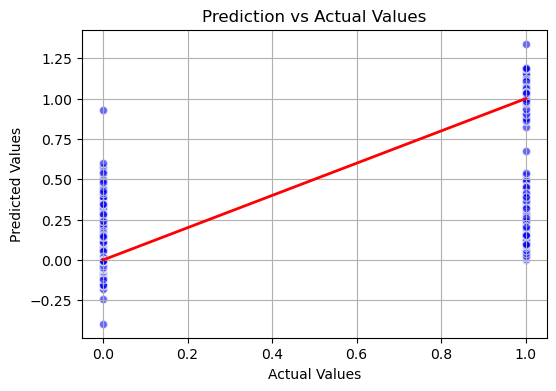

In [62]:
# 1. Prediction vs Actual Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gb, color='blue', edgecolor='w', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual Values")
plt.grid(True)
plt.show()

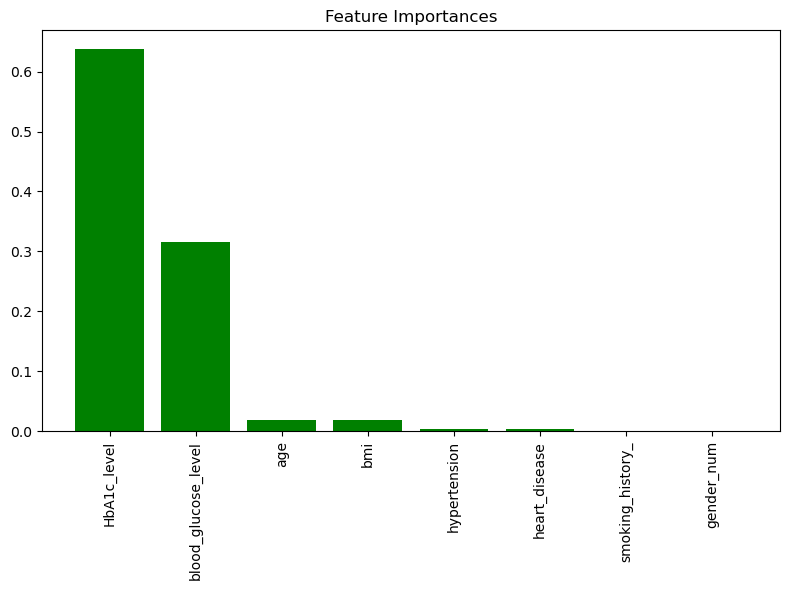

In [72]:
# 3. Feature Importance Plot (for tree-based models like Gradient Boosting)
importances = gb_model.feature_importances_
feature_names = X_train.columns  # If you're using pandas DataFrame for X_train
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

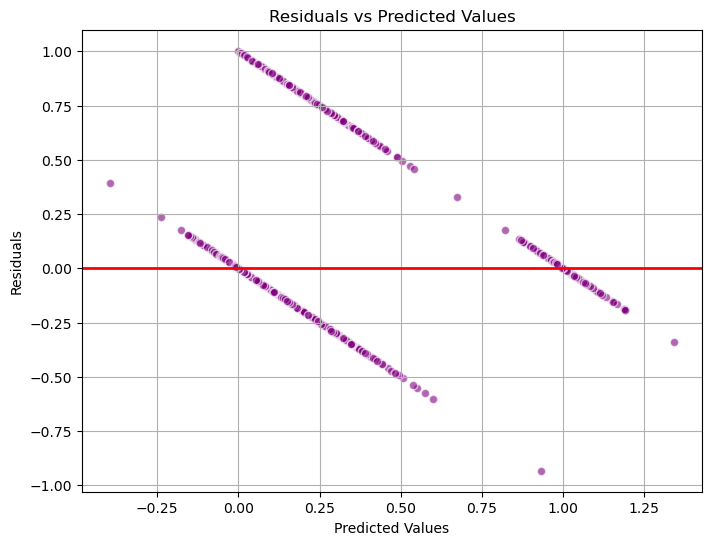

In [63]:
# Visualizing the data using Matplotlib
# 2. Residual Plot
residuals = y_test - y_pred_gb
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gb, residuals, color='purple', edgecolor='w', alpha=0.6)
plt.axhline(0, color='red', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
#pip install reportlab
